# 手写线性回归模型

> 手写一个多维线性回归模型

> 基于numpy和pandas

> 梯度下降方法 and 解析解计算 两种方法

Tips：
   1. 数据集(一元、多元)
   2. 步骤说明(采用梯度下降方法)
   3. 结果演示与验证
   
   
   
数据集准备：linear regression dataset
    

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.DataFrame(pd.read_csv("./dataset/linear regression dataset.csv"))

data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [9]:
# 编写class

class linearreg:
    
    def __init__(self):
        self.w = None
        self.b = None
    def loss(self,x,y):
        '''
        y_ = wx+b
        L = (y-y_)**2
        
        dL/dw =  2*（y_-y）*x
        dL/db = 2*(y_-y)
        
        '''

        samples,features = x.shape
        labels = y.shape[1]
        y_hat = np.add(np.dot(self.w,x.T) , self.b)
        L = 0.5*np.sum(np.power(np.add(y_hat,-y.T),2))/samples

        dw = (y_hat - y.T).dot(x)/samples # lab feat
        db = np.sum(y_hat - y.T,1)/samples  # lab

        return dw,db,L
        
    def train(self,x,y,learning_rate = 0.001,max_iter = 1000):
        '''
        训练
        y_ = wx+b
        L = 0.5 * (y-y_)**2
        
        w,b = initial
        
        for in
         dL/dw,dL/db,L= loss(x,y)
         w = w - dL/dw
         b = b - dL/db
        '''
        # 初始化w,b
        print('Begin training')
        
        x = np.array(x)
        y = np.array(y)
        samples,features = x.shape
        labels = y.shape[1]
        self.w = np.array(np.ones([labels,features]),dtype = np.float32)
        self.b = np.array(np.ones(labels),dtype = np.float32) 
        # 循环
        loss_list = []
        for i in range(max_iter): 
            dw,db,Loss = self.loss(x,y)
            self.w = self.w - learning_rate*dw
            self.b = self.b - learning_rate*db
            loss_list.append(Loss)
            if i % 100 == 0:
                print("第 %d 代 loss = %f" % (i,Loss))
        print('End training')
        return loss_list     
        
    def predict(self,x):
        return np.dot(self.w,x.T) + b
    
    def sep_data(self,data,rate = 0.7,y = None):
        '''
        分割数据集
        '''
        import functools
        
        data = pd.DataFrame(data)
        n_sample,n_col = data.shape
        train = data.sample(int(n_sample*rate))
        test = list(filter(lambda i : i not in list(train.index),list(data.index)))
        test = data.loc[test]
        if y == None:
            y = [data.columns[n_col-1]]
        train = train.sort_index()  
        x = list(filter(lambda i:i not in y,data.columns))
        train_x = train[x]
        
        train_y = train[y]
        test_x = test[x]
        test_y = test[y]
        
        return train_x,train_y,test_x,test_y
    
print('Finish')

Finish


In [10]:
lr = linearreg()
x,y,test_x,test_y = lr.sep_data(data)

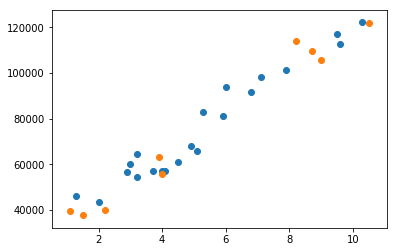

In [11]:
# 绘图
plt.scatter(x,y)
plt.scatter(test_x,test_y)

Begin training
第 0 代 loss = 3153938985.166904
第 100 代 loss = 1616766421.616345
第 200 代 loss = 846292456.143230
第 300 代 loss = 460060027.825833
第 400 代 loss = 266395698.721306
第 500 代 loss = 169239777.953084
第 600 代 loss = 120450674.142450
第 700 代 loss = 95901588.031508
第 800 代 loss = 83501052.455077
第 900 代 loss = 77189266.810145
End training


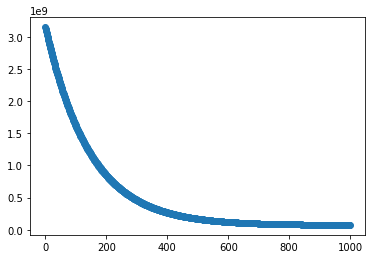

In [12]:
loss = lr.train(x,y,learning_rate=0.0001)
plt.scatter(range(len(loss)),loss)

In [13]:
arr = np.arange(start = 0 , stop = 15, step = 0.05)
y_line = arr*lr.w + lr.b


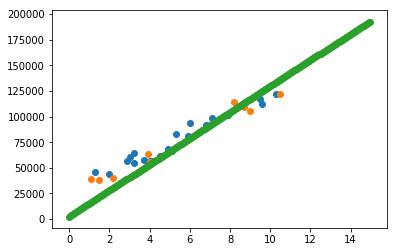

In [14]:
# 绘图
plt.scatter(x,y)
plt.scatter(test_x,test_y)
plt.scatter(arr,y_line)

### 采用解析解方法计算线性回归

推导见西瓜书P55页
说明：此推导是一元线性回归的推导，多元线性回归计算X.T*X的逆不一定存在，因此，不一定存在多元LR的解析解
```
w = sum(y(x-mean(x))) / (sum(x**2)-sum(x)**2/m)
b = 1/m  * sum(y-wx)
```